In [1]:
import numpy as pn
import pandas as pd
import array
import itertools
import matplotlib.pyplot as pl
import matplotlib.image as mpimg

In [2]:
####################################        Header   

f = open("mdb155.pgm", "rb")

L = f.readlines()

L2 = [L[i] for i in range(0,len(L)) if i < 3]

[e.decode().rstrip() for e in L2]

# type, cols*rows, maxValue

['P5', '1024 1024', '255']

In [3]:
####################################      Data  

L3 = [L[i] for i in range(0,len(L)) if i >= 3]

L4 = [array.array('B', e).tolist() for e in L3 ]

data = list(itertools.chain(*L4))

1024*1024 == len(data)

True

In [4]:
#", ".join([str(e) for e in data])
############################################        Histogram  

df = pd.DataFrame(data)

df = df.rename(columns={0:"n"})

df.groupby(['n'])['n'].count()

n
0      394010
1         410
2        3246
3       13832
4       38159
        ...  
225       601
226       680
227       481
228       185
229        24
Name: n, Length: 230, dtype: int64

Text(0, 0.5, 'times')

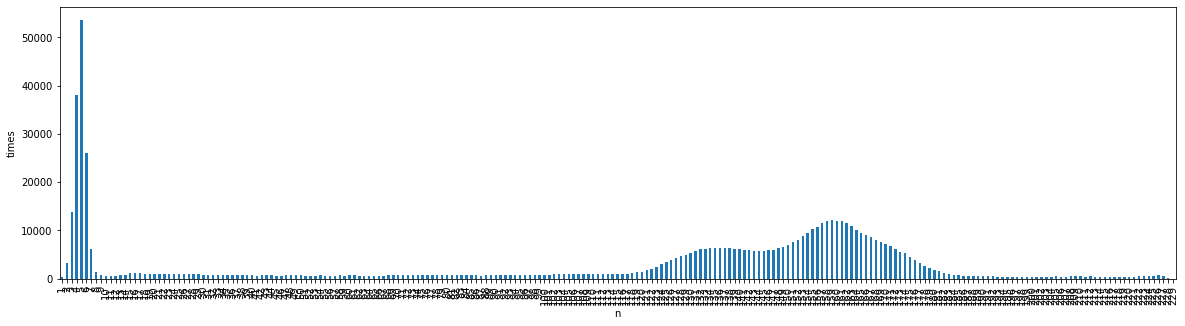

In [5]:
df2 = df.loc[df['n'] > 0] #without values of 0

f = pl.figure(figsize=(20,5)) #size of the figure, 20x + y5

ax = f.gca() 

df2.groupby(['n'])['n'].count().plot(kind="bar", x="n").set_ylabel("times") # Histogram

In [6]:
############   average  

withoutZero = [e for e in data if e is not 0]

avg = sum(withoutZero)/len(withoutZero)

maxValue = max(withoutZero) 

minValue = min(withoutZero) 

z = (maxValue - minValue)/avg
z

2.068064794658987

In [7]:
############# processing data

#o = map(lambda x: 255 if x>z else 0,data)

o = map(lambda x: 0 if x>190 else x,data) 

output = list(o)

In [8]:
############# writing a file 

newFileByteArray = bytearray(output)

f2 = open("output.pgm", "wb")

f2.write(L2[0]) # type of file
f2.write(L2[1]) # size of file
f2.write(L2[2]) # max value
f2.write(newFileByteArray) # data

f2.close()


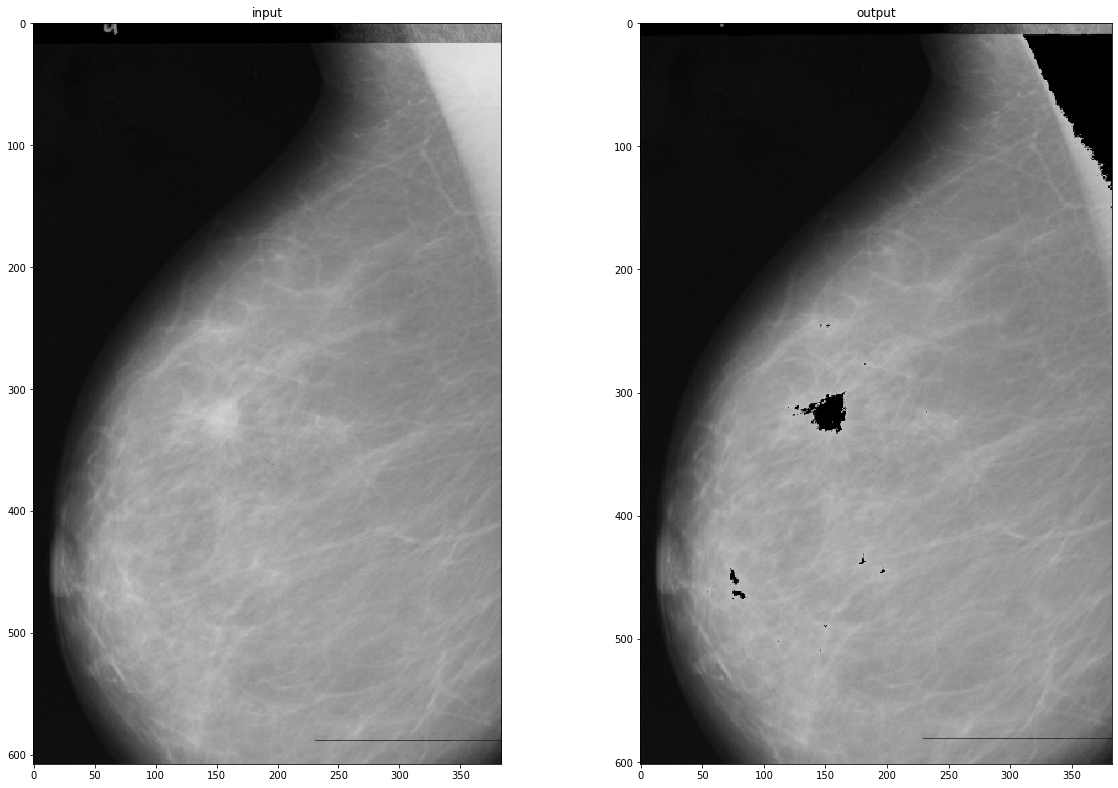

In [9]:
#############     input and output      
%matplotlib inline

images_name = ["input.png","output.png"]
images = [mpimg.imread(name) for name in images_name]

pl.figure(figsize=(20,30)) # size of the figure

columns = 2
for i, image in enumerate(images):
    pl.subplot(len(images) / columns + 1, columns, i + 1)
    pl.title(images_name[i].split(".")[0])
    pl.imshow(image)